# Support Vector Machine

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [13]:
!python --version

Python 3.9.12


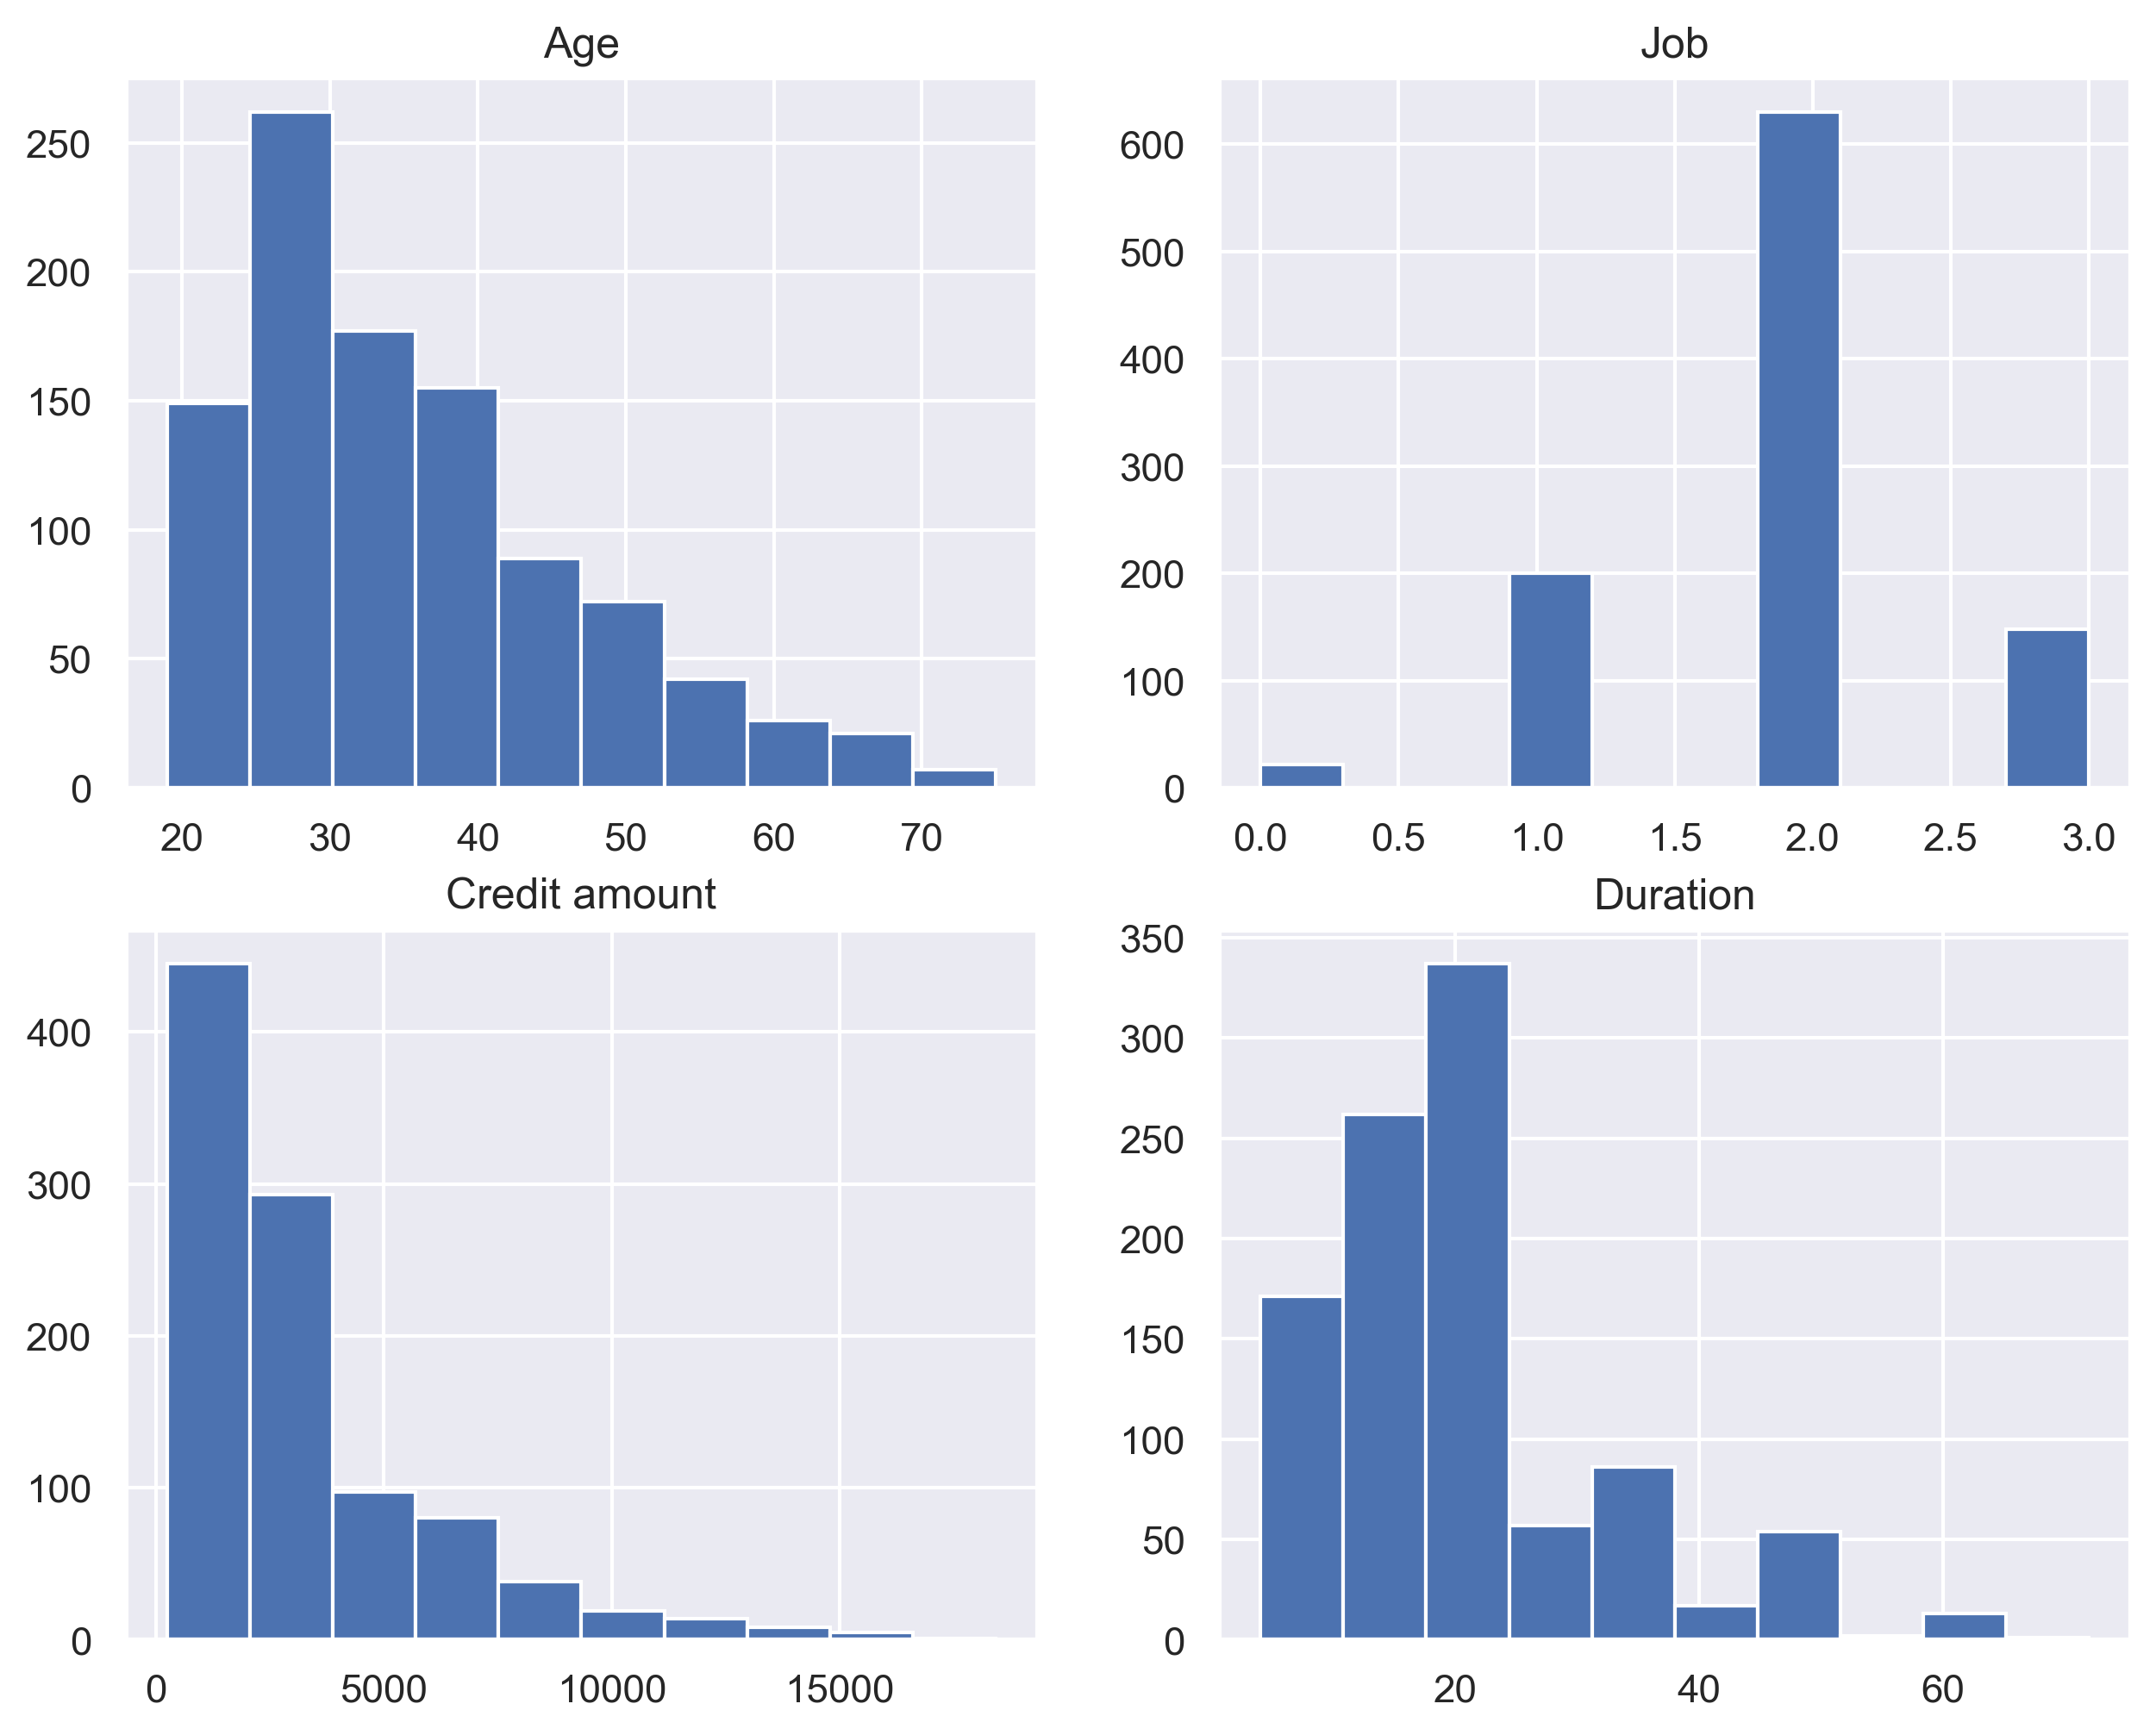

In [14]:
credit = pd.read_csv('german_credit_data.csv')
del credit['Unnamed: 0']

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)


numerical_credit = credit.select_dtypes(exclude='O')

plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

df_scaled = pd.DataFrame(scaled_credit)
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount', 'Duration', 'Risk']

df_scaled['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train['Risk']
y_test = y_test['Risk']

In [17]:
!pip install imblearn

In [18]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


from imblearn.combine import SMOTEENN
smote = SMOTEENN(random_state = 2)

X_train, y_train = smote.fit_resample(X_train, y_train.ravel())

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

## SVM for PD Estimation

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time

In [7]:
param_svc = {'gamma': [1e-6, 1e-2],
             'C':[0.001,.09,1,5,10],
             'kernel':('linear','rbf')}

In [8]:
svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc, 
                                  scoring = 'roc_auc', n_jobs=-1)
halve_SVC.fit(X_train, y_train)
print('Best hyperparameters for first cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

NameError: name 'SVC' is not defined

In [16]:
y_pred_SVC = halve_SVC.predict(X_test)

print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_SVC)))

The ROC AUC score of SVC for first cluster is 0.5834


In [17]:
X_train.head()

,Age,Job,Credit amount,Duration
0,2.414647,0.146949,1.263499,3.243815
1,-0.223927,0.146949,-0.337522,0.008048
2,-0.223927,0.146949,-0.323344,0.256953
3,-1.191404,0.146949,-0.675306,-0.987573
4,-1.279356,-1.383771,-0.455197,0.256953


In [18]:
# Polynomical kernel
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svc = SVC(kernel="poly", degree=3, coef0=1, C=5)

poly_kernel_svm_clf = HalvingRandomSearchCV(svc, param_svc, 
                                  scoring = 'roc_auc', n_jobs=-1)
poly_kernel_svm_clf.fit(X_train, y_train)

y_pred_SVC_poly = poly_kernel_svm_clf.predict(X_test)

print('The ROC AUC score of SVC_poly for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_SVC_poly)))

The ROC AUC score of SVC_poly for first cluster is 0.5011


In [19]:
# Polynomial with higher degree
svc=SVC(kernel="poly", degree=10, coef0=100, C=5)
poly100_kernel_svm_clf = HalvingRandomSearchCV(svc, param_svc, 
                                  scoring = 'roc_auc', n_jobs=-1)

poly100_kernel_svm_clf.fit(X_train, y_train)

y_pred_SVC_poly100 = poly100_kernel_svm_clf.predict(X_test)

print('The ROC AUC score of SVC_poly100 for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_SVC_poly100)))

The ROC AUC score of SVC_poly100 for first cluster is 0.5336


In [ ]:
# Gaussian RBF Kernel

svc=SVC(kernel="rbf", gamma=5, C=0.001)
poly100_kernel_svm_clf = HalvingRandomSearchCV(svc, param_svc, 
                                  scoring = 'roc_auc', n_jobs=-1)

rbf_kernel_svm_clf.fit(X_train, y_train)

### LInear classifier

In [ ]:
# linear SVM
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)

## Random Forest for PD Estimation

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(random_state=42)

In [15]:
param_rfc = {'n_estimators': [100, 300],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split':[5, 10]}

In [16]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,
                                 scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train, y_train)
print('Best hyperparameters for first cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

Best hyperparameters for first cluster in RF 0.9112271603378194 with {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'entropy'}


In [17]:
y_pred_RF = halve_RF.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_RF)))

The ROC AUC score of RF for first cluster is 0.5917
